# Inverse kinematic in 2 dimension

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [56]:
def compute_end_pos(links, theta, alpha):
    pos=np.array([0,0,0,1])
    for i in range(len(links)-1,-1,-1):
        st=np.sin(theta[i])
        ct=np.cos(theta[i])
        sa=np.sin(alpha[i])
        ca=np.cos(alpha[i])
        transf=[[ct, -ca*st, st*sa,  links[i]*(ct-ca*st)],
                   [st, ca*ct, -ca*sa,  links[i]*(st+ca*ct)],
                   [0,  sa,    ca,      sa*links[i]        ],
                   [0,  0,     0,       1                  ]]
        pos=np.dot(transf,pos)
    return pos[:3]

In [57]:
def PSO(links, target, pop_size, max_iter, w, c_soc, c_cog):
    #initialize
    dim=len(links)*2
    #theta=first half of the vector, alpha=second half
    pop=np.random.rand(pop_size,dim)*2*np.pi
    vel=np.zeros((pop_size,dim))
    pbest=pop.copy()
    pbest_fit=np.zeros(pop_size)
    gbest=pop[0].copy()
    gbest_fit=1e10
    gbest_history=[]

    #initialise pbest and gbest
    for i in range(pop_size):
        pos=compute_end_pos(links, pop[i][0:len(links)], pop[i][len(links):])
        pbest_fit[i]=np.linalg.norm(pos-target)
        if pbest_fit[i]<gbest_fit:
            gbest=pop[i].copy()
            gbest_fit=pbest_fit[i]

    #main loop
    it=0
    gbest_history.append(gbest.copy())
    while it<max_iter:
        it+=1
        for i in range(pop_size):
            end_pos = compute_end_pos(links, pop[i][0:len(links)], pop[i][len(links):])
            fit=np.linalg.norm(end_pos-target)

            if fit<pbest_fit[i]:
                pbest[i]=pop[i].copy()
                pbest_fit[i]=fit
                if fit<gbest_fit:
                    gbest=pop[i].copy()
                    gbest_fit=fit
                if fit<1e-3:
                    print(f"position: {end_pos}")
                    print(f"fit: {fit}")
                    print(f"best_pop: {pop[i]}")
                    print(f"gbest: {gbest}")
                    gbest_history.append(gbest.copy())
                    print(f"Solution found in {it} iteration :)")
                    return gbest_history, gbest
                
            vel[i]=w*vel[i]+c_soc*np.random.rand()*(gbest-pop[i])+c_cog*np.random.rand()*(pbest[i]-pop[i])
            pop[i]+=vel[i]      
        gbest_history.append(gbest.copy())
            
    return gbest_history, gbest

 ### Display

In [58]:
def DisplayNlinkarm(links, theta, alpha):
    #plot arm
    trasf=np.eye(4)
    x=[0]
    y=[0]
    z=[0]
    for i in range(len(links)):
        st=np.sin(theta[i])
        ct=np.cos(theta[i])
        sa=np.sin(alpha[i])
        ca=np.cos(alpha[i])
        new_trasf=[[ct, -ca*st, st*sa,  links[i]*(ct-ca*st)],
                   [st, ca*ct, -ca*sa,  links[i]*(st+ca*ct)],
                   [0,  sa,    ca,      sa*links[i]        ],
                   [0,  0,     0,       1                  ]]
        trasf=np.dot(trasf,new_trasf)
        x.append(np.dot(trasf,[0,0,0,1])[0])
        y.append(np.dot(trasf,[0,0,0,1])[1])
        z.append(np.dot(trasf,[0,0,0,1])[2])

    #plot in 3D space
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [ ]:
def Display_animated(links,gbest_history, target):
    fig = plt.figure()
    #plot in 3D space
    ax = fig.add_subplot(projection='3d')
    
    line = ax.plot([], [], [])
    angles=gbest_history
    plt.plot(target[0], target[1], target[2], 'ro')

    def animate(i, line):
        trasf=np.eye(4)
        x=[0]
        y=[0]
        z=[0]
        for j in range(len(links)):
            st=np.sin(angles[i][j])
            ct=np.cos(angles[i][j])
            sa=np.sin(angles[i][j+3])
            ca=np.cos(angles[i][j+3])
            new_trasf=[[ct, -ca*st, st*sa,  links[j]*(ct-ca*st)],
                    [st, ca*ct, -ca*sa,  links[j]*(st+ca*ct)],
                    [0,  sa,    ca,      sa*links[j]        ],
                    [0,  0,     0,       1                  ]]
            trasf=np.dot(trasf,new_trasf)
            x.append(np.dot(trasf,[0,0,0,1])[0])
            y.append(np.dot(trasf,[0,0,0,1])[1])
            z.append(np.dot(trasf,[0,0,0,1])[2])
        line.set_data(x,y)
        line.set_3d_properties(z)
        if i==len(gbest_history)-1:
            plt.title('Iteration: '+str(i)+" Converged")
        else:
            plt.title('Iteration: '+str(i))
        return line,

    anim = animation.FuncAnimation(fig, animate,
                                frames=len(angles), fargs=(line), interval=10000)
    anim.save('3dim.gif', fps=2)
    plt.show()
    plt.close()



## Test

### N link robotic arm

In [60]:
history, final_angles = PSO([2,3,4], [ 2.9330127 ,  1.15192379, 10.06217783], 100, 5000, 0.5, 1, 1)

position: [ 2.93225363  1.15151931 10.06190905]
fit: 0.0009011306805651645
best_pop: [0.22912535 1.33880295 6.63702066 1.53009246 5.00455842 3.0174567 ]
gbest: [0.22912535 1.33880295 6.63702066 1.53009246 5.00455842 3.0174567 ]
Solution found in 25 iteration :)


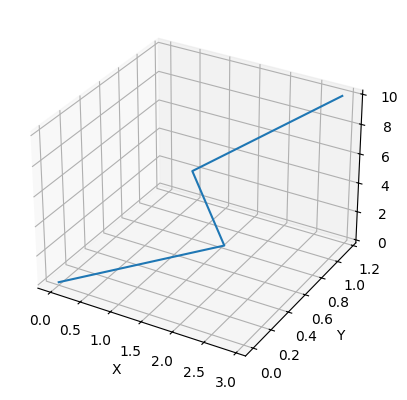

In [61]:
DisplayNlinkarm([2,3,4], final_angles[0:3], final_angles[3:6])

MovieWriter ffmpeg unavailable; using Pillow instead.


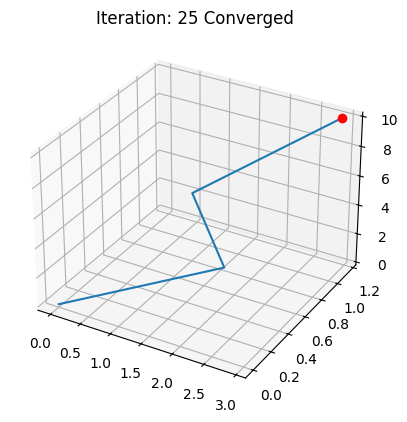

In [62]:
Display_animated([2,3,4], history, [ 2.9330127 ,  1.15192379, 10.06217783])